In [1]:
# Nathanael Brian
# brian.atmawidjaja@gmail.com

In [2]:
import pandas as pd
import dateutil
import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
import numpy as np
import math
from sympy import S, symbols, init_printing

data = pd.read_csv("v201810.csv") 
data.columns = ['customer_id','gender','most_recent_order_date','order_count','predicted_gender']
data.head(10)

,customer_id,gender,most_recent_order_date,order_count,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.50,1
1,1001,0,2017-01-01 00:29:56,338.00,1
2,1002,1,2017-01-01 01:30:31,733.00,1
3,1003,1,2017-01-01 01:34:22,772.00,1
4,1004,0,2017-01-01 03:11:54,508.00,1
5,1005,1,2017-01-01 10:08:05,338.00,0
6,1006,1,2017-01-01 15:42:57,1526.43,1
7,1007,0,2017-01-01 15:59:50,168.00,0
8,1008,0,2017-01-01 18:01:04,207.99,0
9,1009,1,2017-01-01 19:27:17,283.00,1


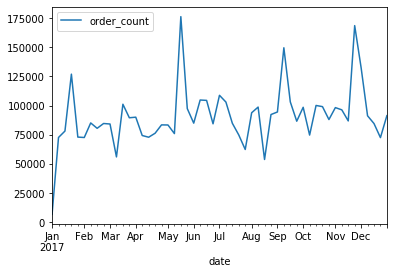

In [3]:
data['date'] = data['most_recent_order_date'].apply(dateutil.parser.parse, dayfirst=True)
dataB = data.groupby([pd.Grouper(key='date', freq='W')])['order_count'].sum().reset_index().sort_values('date')
ax = plt.gca()
dataB.plot(kind='line',x='date',y='order_count',ax=ax)
plt.show()

In [4]:
data.groupby(['gender'])['order_count'].mean()
# There is a significant difference between the two average order of the two genders.
# p-value = 0.0481426 < 5% level of significance
# Based on the sample data, with 5% level of significance, the true average order of gender 0 and gender 1 are different.

gender
0    363.890006
1    350.708361
Name: order_count, dtype: float64

In [5]:
data.groupby(['gender'])['order_count'].std()

gender
0    396.533215
1    377.504737
Name: order_count, dtype: float64

In [6]:

confusionMatrix = confusion_matrix(data['gender'].tolist(), data['predicted_gender'].tolist())
print(confusionMatrix)

[[3349 3410]
 [1463 5249]]


In [7]:

print(classification_report(data['gender'].tolist(), data['predicted_gender'].tolist()))
# High precision and low recall shows that we miss a lot of positive examples, but those positive prediction are indeed positive

              precision    recall  f1-score   support

           0       0.70      0.50      0.58      6759
           1       0.61      0.78      0.68      6712

    accuracy                           0.64     13471
   macro avg       0.65      0.64      0.63     13471
weighted avg       0.65      0.64      0.63     13471



In [8]:
# My favorite technique is EM Algorithm which i just recently learned. It is a fascinating algorithm that
# has the ability to deal with missing data and unobserved features.

((-0.9242997541949087, -0.006305942692638844), (-4.18805255676881, 3.365863673844757))


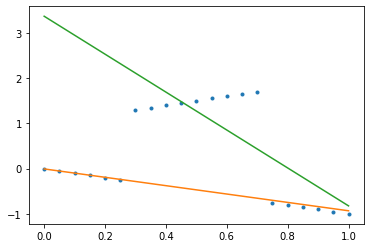

((-0.9999999999999964, 0.0), (0.4239926121977078, 1.2688029315047515))


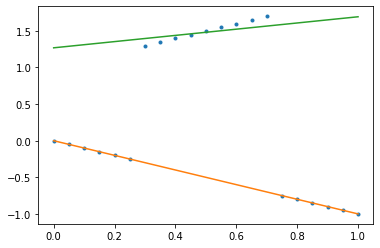

((-1.0000000000000036, 0.0), (0.9999999999990905, 1.0))


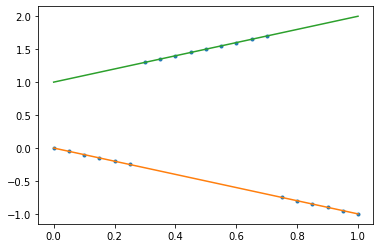

((-1.0000000000000036, 0.0), (0.9999999999990905, 1.0))


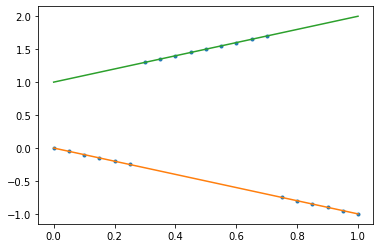

((-1.0000000000000036, 0.0), (0.9999999999990905, 1.0))


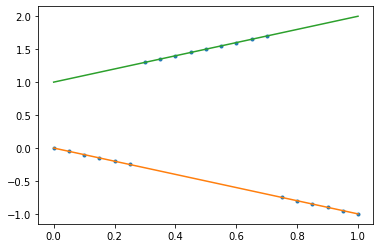

In [13]:
x = np.arange(0.0, 1.05, 0.05)
y = []
for xi in x:
    if abs(xi - 0.5) < 0.25:
        y.append(xi + 1)
    else:
        y.append(-xi)


def EM(x, y, a1, b1, a2, b2):
    # Expectation (E) Step
    # Residuals r1(i) = a1 xi + b1 - yi
    r1 = []  # a1 xi + b1 - yi
    r2 = []  # a2 xi + b2 - yi
    for i in range(len(x)):
        r1.append(a1 * x[i] + b1 - y[i])
        r2.append(a2 * x[i] + b2 - y[i])

    # Weights. sigma^2=0.1
    w1 = []
    w2 = []
    for i in range(len(x)):
        w1.append(math.e ** (-(r1[i] ** 2) / (0.1 ** 2)) / (
                    math.e ** (-(r1[i] ** 2) / (0.1 ** 2)) + math.e ** (-(r2[i] ** 2) / (0.1 ** 2))))
        w2.append(math.e ** (-(r2[i] ** 2) / (0.1 ** 2)) / (
                    math.e ** (-(r1[i] ** 2) / (0.1 ** 2)) + math.e ** (-(r2[i] ** 2) / (0.1 ** 2))))
    # Maximization (M) Step
    sum_wixi2_1 = 0
    sum_wixi_1 = 0
    sum_wi1_1 = 0
    sum_wixiyi_1 = 0
    sum_wiyi_1 = 0

    sum_wixi2_2 = 0
    sum_wixi_2 = 0
    sum_wi1_2 = 0
    sum_wixiyi_2 = 0
    sum_wiyi_2 = 0

    for i in range(len(x)):
        sum_wixi2_1 += (w1[i] * (x[i]**2))
        sum_wixi_1 += (w1[i] * x[i])
        sum_wi1_1 += (w1[i])
        sum_wixiyi_1 += (w1[i] * x[i] * y[i])
        sum_wiyi_1 += (w1[i] * y[i])

        sum_wixi2_2 += (w2[i] * (x[i] ** 2))
        sum_wixi_2 += (w2[i] * x[i])
        sum_wi1_2 += (w2[i])
        sum_wixiyi_2 += (w2[i] * x[i] * y[i])
        sum_wiyi_2 += (w2[i] * y[i])

    # Least Squares xhat = inv(AT*A) AT*b
    M1 = np.array([[sum_wixi2_1, sum_wixi_1], [sum_wixi_1, sum_wi1_1]])
    E1 = np.array([[sum_wixiyi_1],[sum_wiyi_1]])
    M2 = np.array([[sum_wixi2_2, sum_wixi_2], [sum_wixi_2, sum_wi1_2]])
    E2 = np.array([[sum_wixiyi_2], [sum_wiyi_2]])
    MT1 = np.transpose(M1)
    MT2 = np.transpose(M2)
    Xhat1 = np.dot(np.linalg.inv(np.dot(MT1, M1)), np.dot(MT1, E1))
    Xhat2 = np.dot(np.linalg.inv(np.dot(MT2, M2)), np.dot(MT2, E2))

    a1 = Xhat1[0][0]
    b1 = Xhat1[1][0]
    a2 = Xhat2[0][0]
    b2 = Xhat2[1][0]
    return (a1, b1), (a2, b2)


c = np.random.uniform(0, 1, 4)
ab = (EM(x, y, c[0], c[1], c[2], c[3]))
ay1 = x*ab[0][0] + ab[0][1]
ay2 = x*ab[1][0] + ab[1][1]
z1 = np.polyfit(x, ay1, 1)
z2 = np.polyfit(x, ay2, 1)
f1 = np.poly1d(z1)
f2 = np.poly1d(z2)

print(ab)
init_printing()
fig = plt.figure()
plt.plot(x, y, '.')
plt.plot(x, f1(x), '-')
plt.plot(x, f2(x), '-')
plt.show()

for i in range(4):
    ab = EM(x, y, ab[0][0], ab[0][1], ab[1][0], ab[1][1])
    ay1 = x * ab[0][0] + ab[0][1]
    ay2 = x * ab[1][0] + ab[1][1]
    z1 = np.polyfit(x, ay1, 1)
    z2 = np.polyfit(x, ay2, 1)
    f1 = np.poly1d(z1)
    f2 = np.poly1d(z2)
    x_ = symbols("x")
    
    print(ab)
    init_printing()
    fig = plt.figure()
    plt.plot(x, y, '.')
    plt.plot(x, f1(x), '-')
    plt.plot(x, f2(x), '-')
    plt.show()